# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [15]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

### Take a look at the data 

C:\Users\ΑΝΝΑ\AppData\Local\Temp\ipykernel_13040\4209691286.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


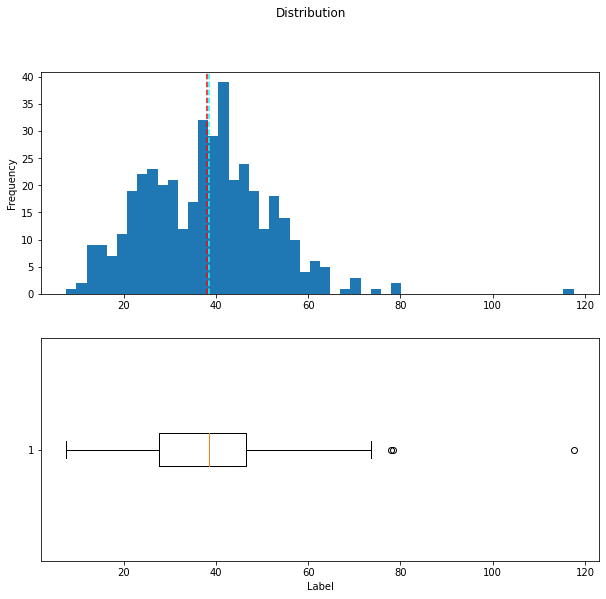

In [16]:
# Your code to explore data and train a regression model
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#check our labels prices -distribution of values
labels = data[data.columns[-1]]
labels
#create a histogram and a boxplot
fig , ax  = plt.subplots(2,1,figsize = (10,9))
ax[0].hist(labels,bins = 50)
ax[0].set_ylabel('Frequency')
ax[0].axvline(labels.mean(),color = 'red',linestyle = 'dashed')
ax[0].axvline(labels.median(),color = 'cyan', linestyle = 'dashed')
ax[1].boxplot(labels,vert = False)
ax[1].set_xlabel('Label')
fig.suptitle('Distribution')
fig.show()


In [17]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


### Outliers 
Remove above 70 it is easy to look at the values 


In [19]:
data = data[data['price_per_unit']<70]
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,2013.146875,17.768627,1095.813873,4.063725,24.968931,121.533245,37.341422
std,0.282129,11.294566,1267.491418,2.938494,0.012470,0.015418,12.476363
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.100000,289.324800,1.000000,24.962990,121.527600,27.300000
50%,2013.167000,16.150000,492.944150,4.000000,24.971100,121.538535,38.250000
75%,2013.417000,28.050000,1463.122750,6.000000,24.977998,121.543222,46.100000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,69.700000


### Check for missing values 

In [21]:
data.isnull().sum()
#no missing values so we can continue with our data 

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

C:\Users\ΑΝΝΑ\AppData\Local\Temp\ipykernel_13040\107989070.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


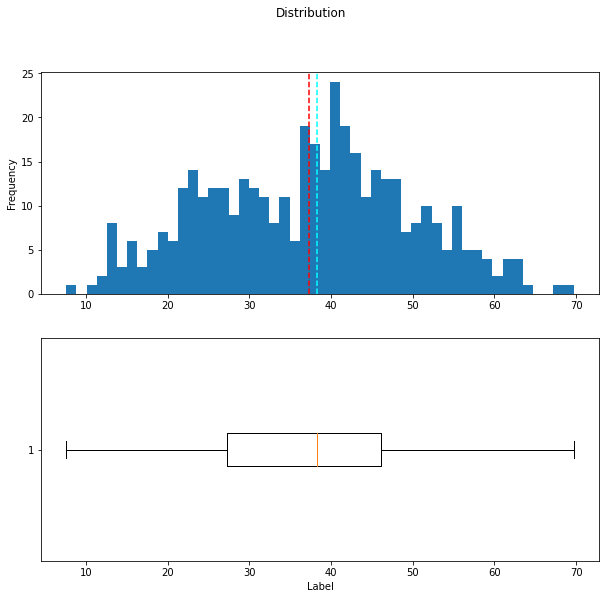

In [23]:
#take a look at the data again for labels
#create a histogram and a boxplot
labels = data[data.columns[-1]]
labels
fig , ax  = plt.subplots(2,1,figsize = (10,9))
ax[0].hist(labels,bins = 50)
ax[0].set_ylabel('Frequency')
ax[0].axvline(labels.mean(),color = 'red',linestyle = 'dashed')
ax[0].axvline(labels.median(),color = 'cyan', linestyle = 'dashed')
ax[1].boxplot(labels,vert = False)
ax[1].set_xlabel('Label')
fig.suptitle('Distribution')
fig.show()


### Correlation matrix using scatterplots 




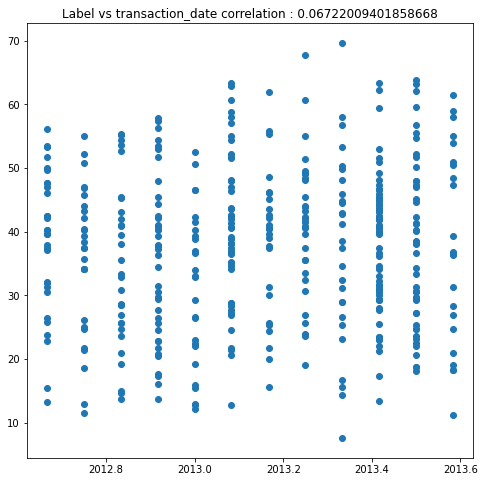

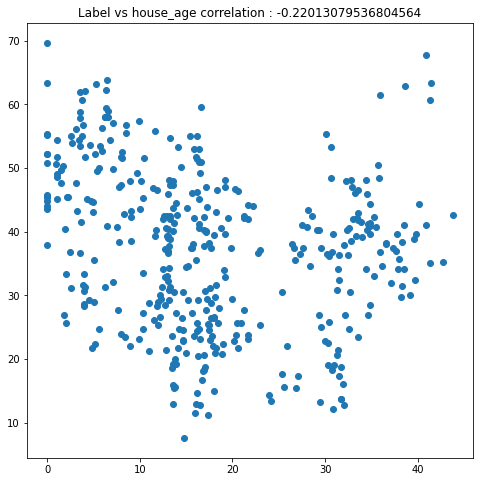

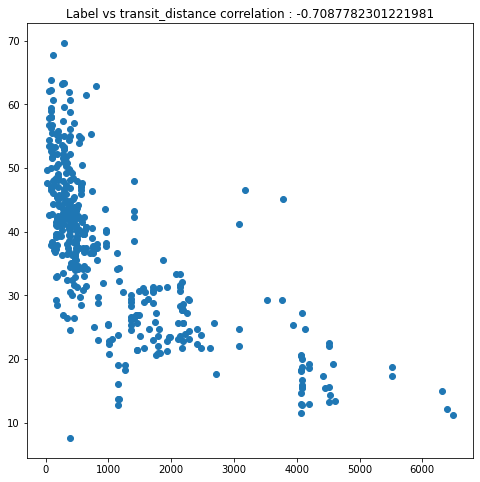

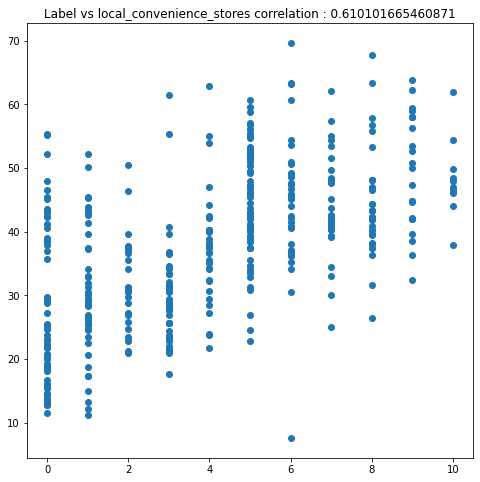

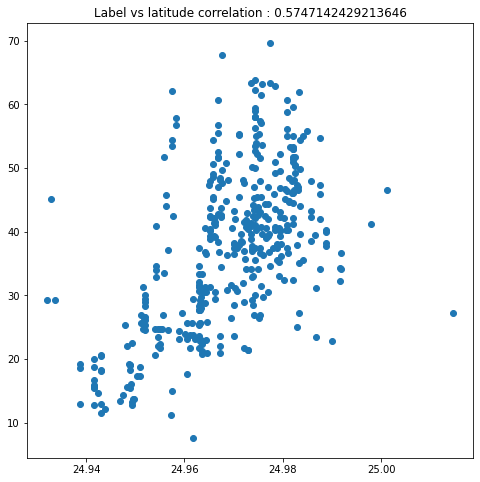

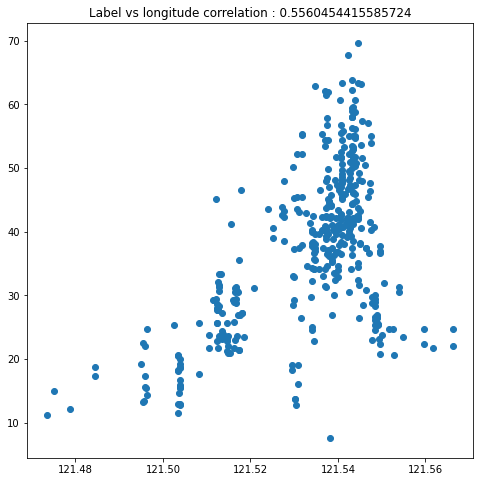

In [32]:
for col in data.columns[0:-1]:
    fig = plt.figure(figsize=(8,8))
    ax = fig.gca()
    feature = data[col]
    correlation = feature.corr(labels)
    plt.scatter(x=feature,y=labels)
    plt.title('Label vs ' + col+ ' correlation : '+str(correlation))


In [ ]:
#there is no distinct correlation between them
#soo continue with the features


### Categorical Features
***

C:\Users\ΑΝΝΑ\AppData\Local\Temp\ipykernel_13040\1790880833.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ΑΝΝΑ\AppData\Local\Temp\ipykernel_13040\1790880833.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


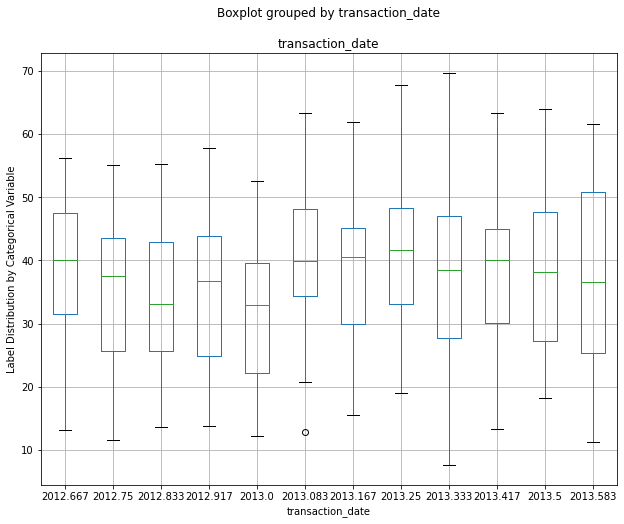

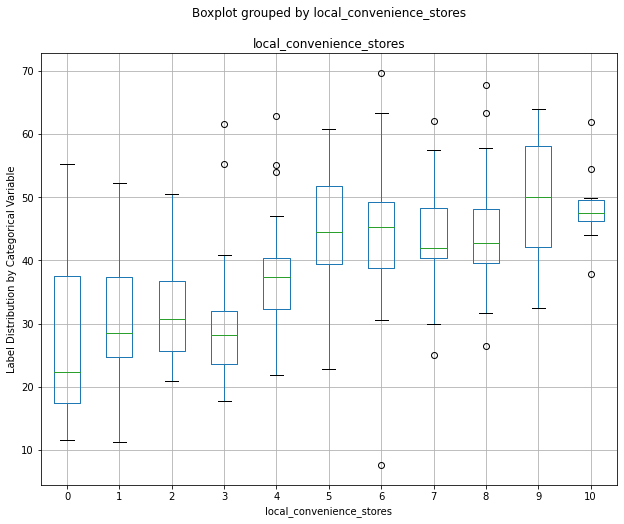

In [33]:
#for categorical features let's visualize them with histograms or boxplots(better to compare with the labels)
categorical_features = ['transaction_date','local_convenience_stores']
for col in categorical_features:
    vis = data[col]
    fig = plt.figure(figsize=(10,8))
    ax = fig.gca()
    data.boxplot(column='price_per_unit',by=col,ax=ax)
    ax.set_title(col)
    ax.set_ylabel("Label Distribution by Categorical Variable")
    fig.show()

### Train-Test split
***

In [50]:
from sklearn.model_selection import train_test_split

X,y = data[data.columns[1:-1]].values,data[data.columns[-1]].values
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Training set has %d rows and testing set has %d rows' %(X_train.shape[0],X_test.shape[0]))

Training set has 285 rows and testing set has 123 rows


### Build model pipeline
***

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#Simple Imputer to replace missing values with different strategies
#Ordinal Encoder to transform categorical features to integers 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np
#preprocessing with pipelines
#scale the numeric features
numeric = [0,1,3,4]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
combine = ColumnTransformer(transformers=[('num',numeric_transformer,numeric)])
pipeline = Pipeline(steps=[('preprocessor', combine),
                           ('regressor', RandomForestRegressor())])
model = pipeline.fit(X_train,(y_train))
print(model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


### Make the predictions
***

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
prediction  = model.predict(X_test)
#evaluate the model
mse = mean_squared_error(y_test,prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, prediction)
print('MSE : {:.2f}\nRMSE : {:.2f}\nR2 : {:.2f}'.format(mse,rmse,r2))


MSE : 46.16
RMSE : 6.79
R2 : 0.72


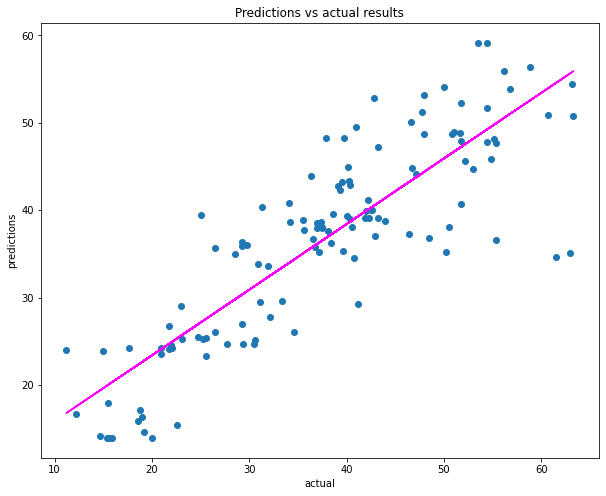

In [56]:
#plot the results
plt.figure(figsize=(10,8))
plt.scatter(y_test,prediction)
plt.title('Predictions vs actual results')
plt.xlabel('actual')
plt.ylabel('predictions')
#add a trend line
z=np.polyfit(y_test,prediction,1)
s=np.poly1d(z)
plt.plot(y_test,s(y_test),color = 'magenta')

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [57]:
# Your code to use the trained model
#firstly save the model in order to be able to load it whenever
import joblib
#create a path for the file
filename = './real_estate_model.pkl'
joblib.dump(model,filename)


['./real_estate_model.pkl']

In [58]:
loaded_model = joblib.load(filename)
#create the new array to predict
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])
results = loaded_model.predict(X_new)
print(results)

[51.09999048 13.92446667]
